# Imports

In [29]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# Read and analyze data

In [23]:
messages = pd.read_csv('SMSSpamCollection', sep="\t",names=['label','message'])

In [24]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# Feature Engineering

In [27]:
messages['length'] = messages['message'].apply(len)

In [28]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


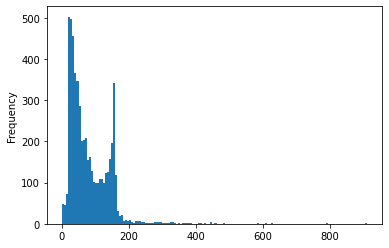

In [36]:
messages['length'].plot.hist(bins=150)

In [37]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [40]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7270aa100>,
      dtype=object)

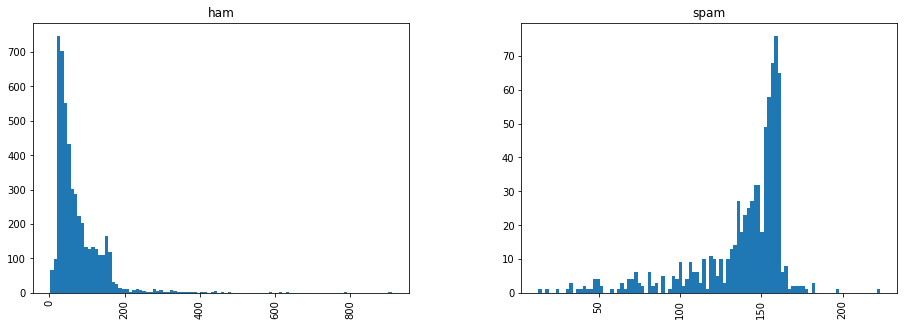

In [49]:
messages.hist(column='length', by='label',bins=100,figsize=(15,5))

span messages tend to have more character length

In [50]:
import string

In [63]:
mess = 'Sample message! Notice: it has puctuation.'

In [64]:
nopunc = [c for c in mess if c not in string.punctuation]

In [65]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [66]:
from nltk.corpus import stopwords

In [67]:
nopunc = ''.join(nopunc)

In [68]:
nopunc

'Sample message Notice it has puctuation'

In [71]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [72]:
clean_mess

['Sample', 'message', 'Notice', 'puctuation']

In [77]:
"""
1. remove punc
2. remove stop word(if,has,have,and etc)
3. return list of clean text word
"""
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [78]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
messages['message'].apply(text_proces)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Task: do stemming for the data

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
bow_trasformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [85]:
len(bow_trasformer.vocabulary_)

11425

In [86]:
mess4 = messages['message'][3]

In [87]:
print(mess4)

U dun say so early hor... U c already then say...


In [88]:
bow4 = bow_trasformer.transform([mess4])

In [92]:
print(bow4,'\n')
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2 

(1, 11425)


In [95]:
messages_bow = bow_trasformer.transform(messages['message'])

In [96]:
print('shape of sparse matrix: ', messages_bow.shape)

shape of sparse matrix:  (5572, 11425)


In [97]:
from sklearn.feature_extraction.text import TfidfTransformer

In [99]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [100]:
tfidf4 = tfidf_transformer.transform(bow4)

In [101]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [103]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [109]:
print(messages_tfidf[:,:5])

  (1687, 2)	0.2558576985216733
  (1778, 0)	0.21292610825064662
  (2309, 1)	0.2576276920464002
  (3460, 4)	0.3277723042317665
  (4060, 1)	0.2675554623245428
  (4725, 0)	0.212757595694062
  (4735, 0)	0.21292610825064662
  (5456, 3)	0.3508416276144738


In [110]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [114]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [115]:
messages['label'][3]

'ham'

In [116]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [117]:
from sklearn.model_selection import train_test_split

In [122]:
X = messages['message']
y = messages['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# use sklearn pipeline

In [123]:
from sklearn.pipeline import Pipeline

In [124]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [126]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fd726be3700>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [127]:
predictions = pipeline.predict(X_test)

In [128]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.74      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839

